In [72]:
%load_ext autoreload
%autoreload 2
from jax.random import split, PRNGKey
from jax import vmap
from jax import numpy as jnp
from aritmetic_bayesian_network import bayesian_network, InferenceForBayesianNetwork
from train_aritmetic_bayesian_network import initialize_model
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import numpy as onp
import equinox as eqx

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
m_cfg = dict(
    key = PRNGKey(0),
    num_augments = 9,
    width_size = 128,
    num_blocks = 1,
    depth = 3,
)
m = initialize_model(
    model_cfg=m_cfg,
    load_idx=0,
    chkpt_folder="aritmetic_bayesian_chkpts/",
)

In [68]:
ks = split(PRNGKey(5327),20000)
*all_z_batches, x0_b, x1_b = vmap(bayesian_network)(ks[:10000])
all_z_batches_hat = vmap(m.rsample)(x0_b,x1_b,ks[10000:])

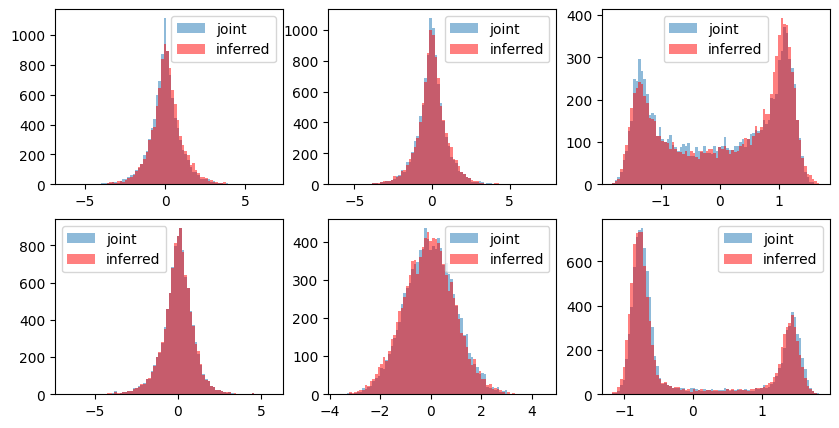

In [69]:
fig, axs = plt.subplots(2,3, figsize=(10,5))
for i,(z,z_) in enumerate(zip(all_z_batches,all_z_batches_hat)):
    col = i % 3
    row = 0 if i <= 2 else 1
    _ ,bins, _ = axs[row,col].hist(onp.array(z), bins = 80, alpha=0.5, label='joint')
    _ = axs[row,col].hist(onp.array(z_), bins = bins, alpha=0.5, color='red', label='inferred')
    axs[row,col].legend()



In [74]:
@eqx.filter_jit
def threshold(T,u):
    return T - jnp.log(1+jnp.exp(T-u))

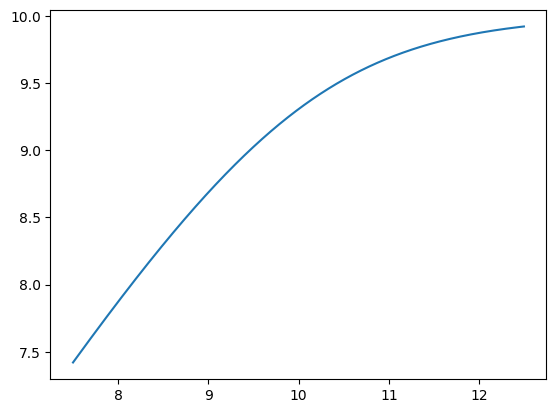

In [78]:
vals = vmap(threshold, in_axes=(None,0))(10, jnp.arange(1000)/1000 * (5) + 7.5)
plt.plot(jnp.arange(1000)/1000 * (5) + 7.5,vals)